In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import pickle
import joblib
import xgboost as xgb
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
# #Connecting to Drive
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import tensorflow as tf
#
# # Check if GPU is available
# if not tf.test.gpu_device_name():
#     print('GPU device not found')
# else:
#     print('GPU available:', tf.test.gpu_device_name())

GPU device not found


### USING HOG

In [2]:
import cv2
import numpy as np
import os
import pandas as pd
from skimage.feature import hog



folder_path = '../rembg/AbnormalRMBG'
hog_image_folder = "hog_images"


if not os.path.exists(hog_image_folder):
    os.makedirs(hog_image_folder)
hog_descs = []
i = 0
for filename in os.listdir(folder_path):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
        fd, hog_image = hog(gray, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(2, 2), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 0
#add row class
df["Class"] = i
print(df)
np.save("hog_descsAbnormal.npy", df.to_numpy())
df

descriptor shape  0  :  (24576, 1)
descriptor shape  1  :  (24576, 1)
descriptor shape  2  :  (24576, 1)
descriptor shape  3  :  (24576, 1)
descriptor shape  4  :  (24576, 1)
descriptor shape  5  :  (24576, 1)
descriptor shape  6  :  (24576, 1)
descriptor shape  7  :  (24576, 1)
descriptor shape  8  :  (24576, 1)
descriptor shape  9  :  (24576, 1)
descriptor shape  10  :  (24576, 1)
descriptor shape  11  :  (24576, 1)
descriptor shape  12  :  (24576, 1)
descriptor shape  13  :  (24576, 1)
descriptor shape  14  :  (24576, 1)
descriptor shape  15  :  (24576, 1)
descriptor shape  16  :  (24576, 1)
descriptor shape  17  :  (24576, 1)
descriptor shape  18  :  (24576, 1)
descriptor shape  19  :  (24576, 1)
descriptor shape  20  :  (24576, 1)
descriptor shape  21  :  (24576, 1)
descriptor shape  22  :  (24576, 1)
descriptor shape  23  :  (24576, 1)
descriptor shape  24  :  (24576, 1)
descriptor shape  25  :  (24576, 1)
descriptor shape  26  :  (24576, 1)
descriptor shape  27  :  (24576, 1)
de

,0,1,2,3,4,5,6,7,8,9,...,24567,24568,24569,24570,24571,24572,24573,24574,24575,Class
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
819,0.551706,0.243006,0.551706,0.551706,0.16676,0.0,0.574923,0.574923,0.574923,0.091599,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
820,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0
821,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.57735,0.57735,0.0,0.57735,0.0,0.0,0


In [3]:

folder_path = '../rembg/NormalRMBG'
output_file = "test_hog.csv"
hog_image_folder = "hog_images"

if not os.path.exists(hog_image_folder):
    os.makedirs(hog_image_folder)
hog_descs = []
i = 0
for filename in os.listdir(folder_path):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
        fd, hog_image = hog(gray, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

      
        # # Save the HOG image
        # hog_image_path = os.path.join(hog_image_folder, f"{i}.jpg")
        # cv2.imwrite(hog_image_path, hog_image)

# Save the LDA-reduced descriptors to a CSV file
df = pd.DataFrame(hog_descs)

i = 1

#add row class
df["Class"] = i
print(df)

np.save("hog_descsNormal.npy", df.to_numpy())
df

descriptor shape  0  :  (24576, 1)
descriptor shape  1  :  (24576, 1)
descriptor shape  2  :  (24576, 1)
descriptor shape  3  :  (24576, 1)
descriptor shape  4  :  (24576, 1)
descriptor shape  5  :  (24576, 1)
descriptor shape  6  :  (24576, 1)
descriptor shape  7  :  (24576, 1)
descriptor shape  8  :  (24576, 1)
descriptor shape  9  :  (24576, 1)
descriptor shape  10  :  (24576, 1)
descriptor shape  11  :  (24576, 1)
descriptor shape  12  :  (24576, 1)
descriptor shape  13  :  (24576, 1)
descriptor shape  14  :  (24576, 1)
descriptor shape  15  :  (24576, 1)
descriptor shape  16  :  (24576, 1)
descriptor shape  17  :  (24576, 1)
descriptor shape  18  :  (24576, 1)
descriptor shape  19  :  (24576, 1)
descriptor shape  20  :  (24576, 1)
descriptor shape  21  :  (24576, 1)
descriptor shape  22  :  (24576, 1)
descriptor shape  23  :  (24576, 1)
descriptor shape  24  :  (24576, 1)
descriptor shape  25  :  (24576, 1)
descriptor shape  26  :  (24576, 1)
descriptor shape  27  :  (24576, 1)
de

,0,1,2,3,4,5,6,7,8,9,...,24567,24568,24569,24570,24571,24572,24573,24574,24575,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.577350,0.000000,0.00000,1
791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229964,0.536489,0.387387,0.516589,0.000000,0.000000,0.516589,0.516589,0.44655,1
792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.276656,0.607309,0.497192,0.497192,0.497192,0.497192,0.105838,0.00000,1
793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1


In [17]:
# Load the Hog features of abnormal and normal both 
chain_array = np.load('hog_descsAbnormal.npy')
normal_array = np.load('hog_descsNormal.npy')

concatenated_array = np.concatenate((chain_array, normal_array), axis=0)

print(concatenated_array.shape)  # prints the shape of the concatenated array

(1618, 24577)


In [18]:

x = concatenated_array[:, :24576]  # selects columns up to 24576 for x
y = concatenated_array[:, -1]  # selects the last column for y
y = y.astype(np.int)

print(x.shape)  # prints the shape of x
print(y.shape)  # prints the shape of y
y


(1618, 24576)
(1618,)


C:\Users\DELL\AppData\Local\Temp\ipykernel_8180\3058675382.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 0, 0, ..., 1, 1, 1])

[6.88414808e-02 5.65887137e-02 3.93497771e-02 ... 7.13319775e-35
 6.87246965e-35 5.66308206e-35]


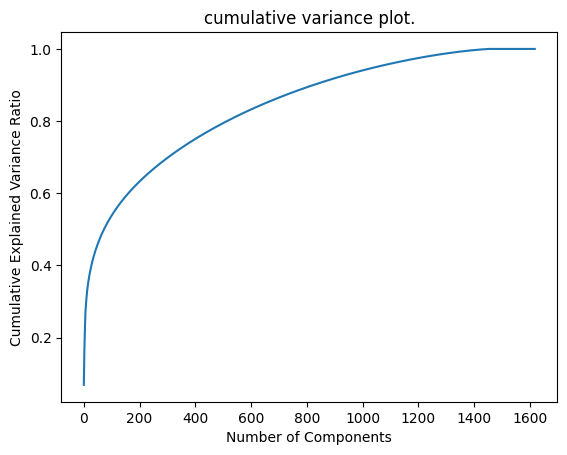

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the HOG features from a numpy file


# Create a PCA object
pca = PCA()

# Fit the PCA model to the HOG features
pca.fit(x)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)
# Plot the explained variance ratio against number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('cumulative variance plot.')
plt.show()


In [20]:
B = pca.transform(x)
B = pd.DataFrame(B)
B

,0,1,2,3,4,5,6,7,8,9,...,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617
0,-6.997923,-0.677005,-5.808519,-2.554430,-5.058221,2.665655,2.497724,0.125052,-0.660603,-4.735615,...,1.268517e-17,4.282599e-16,-7.968886e-17,1.853986e-15,-6.288373e-17,-3.382711e-17,-2.675811e-16,7.447114e-17,-1.281527e-16,1.220134e-16
1,-0.527537,8.202112,-2.914907,-8.068508,-1.061735,-7.524996,5.707605,4.678968,1.426025,1.871949,...,-2.050226e-16,8.599675e-15,3.805224e-15,-7.311859e-16,6.027730e-15,-2.333203e-16,2.026591e-15,3.882189e-15,-1.354602e-15,-1.342093e-15
2,5.316836,7.382024,-7.350750,-3.969687,1.625230,-7.099441,3.595541,1.779967,-1.657366,-2.175391,...,-2.537033e-16,2.385245e-16,2.811945e-15,-6.352883e-16,5.025060e-15,1.101549e-16,6.136584e-16,4.368901e-15,-2.799410e-15,-1.379105e-15
3,8.512567,-3.956362,14.483184,-5.850038,-9.455813,8.467401,4.450583,-2.279119,-3.324752,0.981467,...,3.171291e-16,4.489248e-15,1.269492e-15,2.840610e-17,-2.302412e-15,3.291638e-16,4.280430e-16,-1.823316e-15,9.968155e-16,-1.103135e-15
4,5.469025,-5.661428,10.478082,-7.651062,-6.938419,7.741607,2.723170,-2.544044,-4.226150,0.942994,...,3.778445e-16,3.963626e-15,4.401102e-15,2.353152e-15,-2.571728e-16,2.086005e-16,6.126826e-16,8.897912e-16,2.010761e-15,-1.792254e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,2.973092,10.437930,9.104666,-0.362416,0.620587,5.966487,9.318806,-4.621062,-1.619092,-0.889476,...,-1.532574e-15,2.609024e-15,1.414233e-15,1.903859e-15,-6.071532e-17,1.100465e-15,1.571659e-15,-1.520485e-15,6.305720e-16,-2.697495e-16
1614,4.691520,12.016587,8.814720,-0.257218,8.401752,4.360329,9.340983,-5.774189,-8.037889,-2.289552,...,-9.974660e-17,-7.892992e-16,-8.495808e-16,1.205633e-15,-3.434752e-16,-3.400058e-16,3.354522e-16,5.030698e-17,-2.006208e-15,2.641116e-16
1615,5.331474,14.247662,5.534360,1.500625,5.535790,5.040273,10.058424,-6.757535,-4.357669,-2.413790,...,-9.107298e-17,-1.945492e-15,6.834810e-16,5.468716e-16,2.067790e-15,-8.638923e-16,1.180046e-15,3.590878e-16,-2.393918e-16,-3.109492e-16
1616,-6.311905,17.723431,9.468877,0.183928,-0.954448,1.386291,6.994416,-2.322277,0.152860,1.839447,...,7.823603e-16,-3.726186e-15,-1.309933e-15,5.127192e-16,1.400789e-15,3.165870e-16,-2.983724e-16,-1.301043e-15,-3.738329e-16,4.770490e-17


In [21]:
pca = PCA(n_components=200)
pca.fit(x)

PCA(n_components=200)

In [22]:
# save the model to disk
import joblib
filename = 'PCA_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [23]:
B = pca.transform(x)
B = pd.DataFrame(B)
B

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-6.997923,-0.677005,-5.808519,-2.554430,-5.058221,2.665655,2.497724,0.125064,-0.660589,-4.735633,...,0.208518,-0.518044,1.156466,-0.458095,-1.391613,0.208823,-0.135210,-0.531599,1.970210,-0.683067
1,-0.527537,8.202112,-2.914907,-8.068508,-1.061735,-7.524996,5.707605,4.678963,1.426021,1.871963,...,-0.581608,0.264387,-0.785303,0.195830,-0.430851,1.856035,1.072429,1.537138,0.970379,0.223704
2,5.316836,7.382024,-7.350750,-3.969687,1.625230,-7.099441,3.595541,1.779972,-1.657357,-2.175398,...,1.447782,0.045952,-0.452576,-0.142081,-0.153370,-0.628070,-0.920631,2.801714,-2.325839,-0.009615
3,8.512567,-3.956362,14.483184,-5.850038,-9.455813,8.467401,4.450582,-2.279121,-3.324751,0.981470,...,-0.278005,-0.586136,-2.165981,-0.273303,0.860752,-0.431599,-1.027151,-0.098519,1.133332,1.116835
4,5.469025,-5.661428,10.478082,-7.651062,-6.938419,7.741607,2.723170,-2.544056,-4.226148,0.943007,...,0.246829,-0.011519,0.169999,1.190556,-1.101058,-0.812877,-1.104790,0.635080,0.133675,1.018730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,2.973092,10.437930,9.104666,-0.362416,0.620587,5.966487,9.318806,-4.621068,-1.619101,-0.889476,...,0.537561,-0.217780,-1.998733,0.863183,-2.082245,-0.787643,1.241085,-1.171261,2.527781,-0.930178
1614,4.691520,12.016587,8.814720,-0.257218,8.401752,4.360329,9.340982,-5.774189,-8.037888,-2.289543,...,0.586700,-0.637855,-1.185020,0.720363,-1.616065,0.304579,1.675250,0.727512,0.336531,-0.703452
1615,5.331474,14.247662,5.534360,1.500625,5.535790,5.040273,10.058423,-6.757534,-4.357675,-2.413792,...,1.557619,0.172583,0.005019,-0.197544,-1.446736,-0.696835,1.293604,-0.586782,0.746251,-1.787348
1616,-6.311905,17.723431,9.468877,0.183928,-0.954448,1.386290,6.994417,-2.322276,0.152852,1.839446,...,-1.213168,0.106846,-0.674472,-0.242321,-1.265880,1.783533,-0.847171,2.024980,0.261483,0.574401


In [24]:
B=pd.concat([B, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,0
0,-6.997923,-0.677005,-5.808519,-2.554430,-5.058221,2.665655,2.497724,0.125064,-0.660589,-4.735633,...,-0.518044,1.156466,-0.458095,-1.391613,0.208823,-0.135210,-0.531599,1.970210,-0.683067,0
1,-0.527537,8.202112,-2.914907,-8.068508,-1.061735,-7.524996,5.707605,4.678963,1.426021,1.871963,...,0.264387,-0.785303,0.195830,-0.430851,1.856035,1.072429,1.537138,0.970379,0.223704,0
2,5.316836,7.382024,-7.350750,-3.969687,1.625230,-7.099441,3.595541,1.779972,-1.657357,-2.175398,...,0.045952,-0.452576,-0.142081,-0.153370,-0.628070,-0.920631,2.801714,-2.325839,-0.009615,0
3,8.512567,-3.956362,14.483184,-5.850038,-9.455813,8.467401,4.450582,-2.279121,-3.324751,0.981470,...,-0.586136,-2.165981,-0.273303,0.860752,-0.431599,-1.027151,-0.098519,1.133332,1.116835,0
4,5.469025,-5.661428,10.478082,-7.651062,-6.938419,7.741607,2.723170,-2.544056,-4.226148,0.943007,...,-0.011519,0.169999,1.190556,-1.101058,-0.812877,-1.104790,0.635080,0.133675,1.018730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,2.973092,10.437930,9.104666,-0.362416,0.620587,5.966487,9.318806,-4.621068,-1.619101,-0.889476,...,-0.217780,-1.998733,0.863183,-2.082245,-0.787643,1.241085,-1.171261,2.527781,-0.930178,1
1614,4.691520,12.016587,8.814720,-0.257218,8.401752,4.360329,9.340982,-5.774189,-8.037888,-2.289543,...,-0.637855,-1.185020,0.720363,-1.616065,0.304579,1.675250,0.727512,0.336531,-0.703452,1
1615,5.331474,14.247662,5.534360,1.500625,5.535790,5.040273,10.058423,-6.757534,-4.357675,-2.413792,...,0.172583,0.005019,-0.197544,-1.446736,-0.696835,1.293604,-0.586782,0.746251,-1.787348,1
1616,-6.311905,17.723431,9.468877,0.183928,-0.954448,1.386290,6.994417,-2.322276,0.152852,1.839446,...,0.106846,-0.674472,-0.242321,-1.265880,1.783533,-0.847171,2.024980,0.261483,0.574401,1


In [25]:

csv_data=B.to_csv('Final_HOG_Feature.csv', mode='w',header=False,index=False)

## Reading the final hog features

In [2]:
train_data = pd.read_csv('Final_HOG_Feature.csv',header=None)

In [3]:
#Check for NaN under a single DataFrame column
train_data.isnull().values.any()


X = train_data.drop(columns= 200, axis=1)
X
Y  = train_data[200]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3231    1
3232    1
3233    1
3234    1
3235    1
Name: 200, Length: 3236, dtype: int64

In [4]:
#assigning x the columns from 1 to 27 for training
x = train_data.iloc[:,0:200].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,200]
print("Y values")
print(y)

X values
[[ -6.99792265  -0.67700513  -5.80851931 ...  -1.20166853   0.25428065
    1.44875047]
 [ -0.52753712   8.20211225  -2.91490702 ...   0.60395899   0.48744065
   -0.71803787]
 [  5.31683635   7.38202363  -7.3507504  ...  -1.76569622  -1.88022323
   -1.51679454]
 ...
 [  5.33147401  14.24766223   5.53436035 ...  -0.58678173   0.74625105
   -1.78734815]
 [ -6.31190504  17.72343133   9.46887748 ...   2.02497986   0.26148346
    0.57440141]
 [-15.44228331   1.06122434   6.67995564 ...  -0.18259279   0.3588407
    0.35502079]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
3231    1
3232    1
3233    1
3234    1
3235    1
Name: 200, Length: 3236, dtype: int64


In [5]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=0)

### SVM Linear 

In [32]:
from sklearn import svm
model_svm_l = svm.SVC(kernel='linear')
model_svm_l.fit(x_train, y_train)
joblib.dump(model_svm_l,"model_svm_l")
y_pred = model_svm_l.predict(x_test)

# Performance Parameters
print("SVM Linear kernel")
print("Train Accuracy:",model_svm_l.score(x_train, y_train))
print("Test Accuracy:",model_svm_l.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred, pos_label='positive', average='micro'))



SVM Linear kernel
Train Accuracy: 0.9323802163833076
Test Accuracy: 0.9074074074074074
Precision Score:  0.9074074074074074
Recall Score:  0.9074074074074074
F1 Score:  0.9074074074074074


D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\module 6\CV\CP\New\ONImages\venv\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [33]:
# joblib.dump(model_svm_l, 'svm_model.pkl')

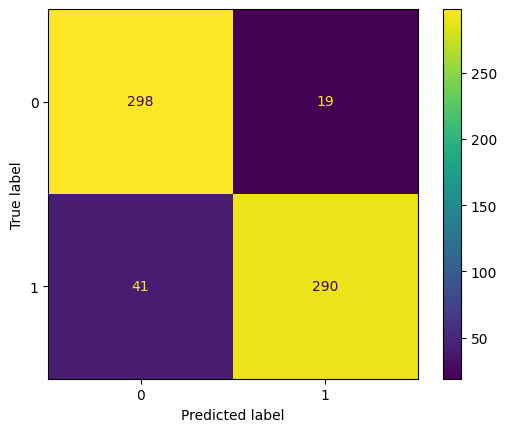

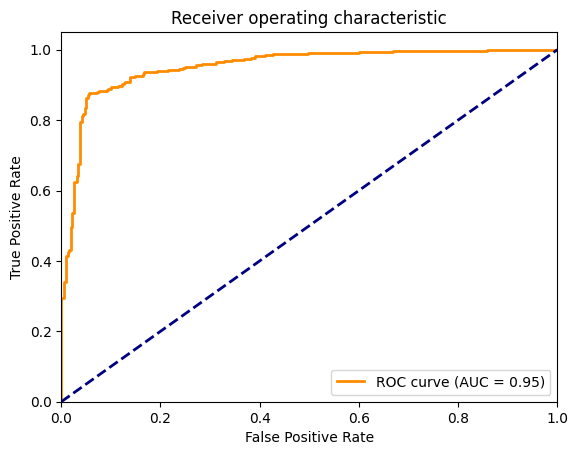

In [36]:
from sklearn.metrics import roc_curve, auc


cm = confusion_matrix(y_test, y_pred)# Print the confusion matrix

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# Compute the probability scores for the test data
y_score = model_svm_l.decision_function(x_test)

# Compute the FPR, TPR, and threshold values for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### SVM with k fold 


Accuracy of each fold - [0.8981481481481481, 0.8809891808346213, 0.8902627511591963, 0.8918083462132921, 0.8979907264296755]
Average accuracy: 0.8918398305569866
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1646
           1       0.89      0.89      0.89      1590

    accuracy                           0.89      3236
   macro avg       0.89      0.89      0.89      3236
weighted avg       0.89      0.89      0.89      3236



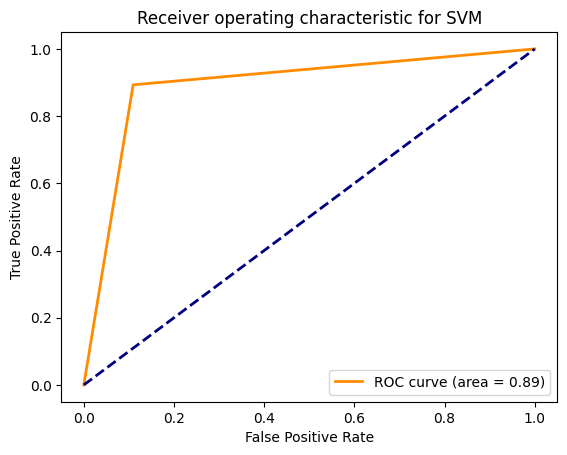

['svm_Kfold_HOG.sav']

In [37]:
from sklearn.model_selection import cross_val_score




k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model_svm = svm.SVC(kernel='linear')


acc_score = []
y_true = []
y_pred = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]

    model_svm.fit(X_train, y_train)

    pred_values = model_svm.predict(X_test)
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


joblib.dump(model_svm, "svm_Kfold_HOG.sav")

    ### RandomForest with **K** fold

accuracy of each fold - [0.9799382716049383, 0.973724884080371, 0.990726429675425, 0.9953632148377125, 0.9505409582689336]
Avg accuracy : 0.978058751693476
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1646
           1       0.99      0.97      0.98      1590

    accuracy                           0.98      3236
   macro avg       0.98      0.98      0.98      3236
weighted avg       0.98      0.98      0.98      3236



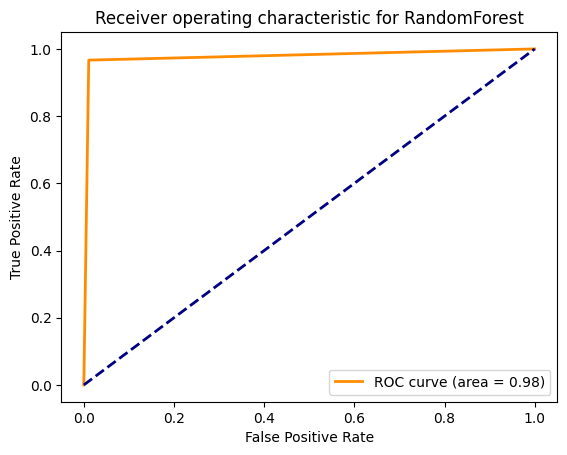

['RF_HOF.sav']

In [42]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelRFK = RandomForestClassifier()

y_true = []
y_pred = []

acc_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]



    modelRFK.fit(X_train,y_train)

    pred_values = modelRFK.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RandomForest')
plt.legend(loc="lower right")
plt.show()

joblib.dump(model_svm_l, "RF_HOF.sav")

# HP Random Forest

In [6]:
k = 5
kf = KFold(n_splits=k, random_state=None)


n_estimators_list = [10, 20, 50, 100, 200, 500]
for n_estimators in n_estimators_list:
    print(n_estimators)
    print("__________________________________________________________________")
    modelRFK = RandomForestClassifier(n_estimators=n_estimators, max_depth=30)

    y_true = []
    y_pred = []

    acc_score = []
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = Y[train_index] , Y[test_index]



        modelRFK.fit(X_train,y_train)

        pred_values = modelRFK.predict(X_test)
        acc = accuracy_score(pred_values , y_test)
        acc_score.append(acc)
        y_true.extend(y_test)
        y_pred.extend(pred_values)

    avg_acc_score = sum(acc_score)/k

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))

    print(classification_report(y_true, y_pred))



10
__________________________________________________________________
accuracy of each fold - [0.9567901234567902, 0.9459041731066461, 0.9304482225656878, 0.9459041731066461, 0.8299845440494591]
Avg accuracy : 0.9218062472570459
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1646
           1       0.96      0.88      0.92      1590

    accuracy                           0.92      3236
   macro avg       0.92      0.92      0.92      3236
weighted avg       0.92      0.92      0.92      3236

20
__________________________________________________________________
accuracy of each fold - [0.9459876543209876, 0.9613601236476044, 0.9706336939721792, 0.9659969088098919, 0.9319938176197836]
Avg accuracy : 0.9551944396740893
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1646
           1       0.96      0.95      0.95      1590

    accuracy                           0.96      32

### Logistic Regression using k fold 


accuracy of each fold - [0.816414686825054, 0.8682505399568035, 0.8333333333333334, 0.816017316017316, 0.8311688311688312, 0.9090909090909091, 0.7597402597402597]
Avg accuracy : 0.833430839447501
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1646
           1       0.83      0.83      0.83      1590

    accuracy                           0.83      3236
   macro avg       0.83      0.83      0.83      3236
weighted avg       0.83      0.83      0.83      3236



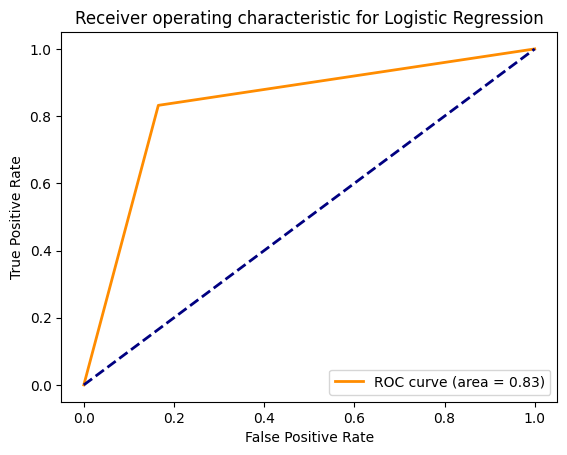

['LG_HOG.sav']

In [43]:
k = 7
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []
y_true = []
y_pred = []


for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]



    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


joblib.dump(model_svm_l, "LG_HOG.sav")

### Decision Tree with Kfold

accuracy of each fold - [0.9398148148148148, 0.9335394126738794, 0.9489953632148377, 0.9505409582689336, 0.9520865533230294]
Avg accuracy : 0.9449954204590989
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1646
           1       0.93      0.96      0.94      1590

    accuracy                           0.94      3236
   macro avg       0.95      0.95      0.94      3236
weighted avg       0.95      0.94      0.94      3236

[[1536  110]
 [  68 1522]]


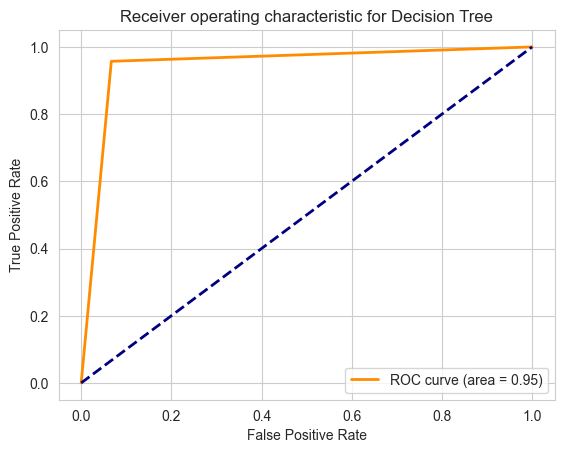

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

k = 5
kf = KFold(n_splits=k, random_state=None)
modelDT = DecisionTreeClassifier()
acc_score = []
y_true = []
y_pred = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelDT.fit(X_train, y_train)

    pred_values = modelDT.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)


avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))




fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


#### HP tuning DT

accuracy of each fold - [0.9691358024691358, 0.9443585780525502, 0.9397217928902627, 0.9412673879443586, 0.9443585780525502]
Avg accuracy : 0.9477684278817715
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1646
           1       0.95      0.95      0.95      1590

    accuracy                           0.95      3236
   macro avg       0.95      0.95      0.95      3236
weighted avg       0.95      0.95      0.95      3236



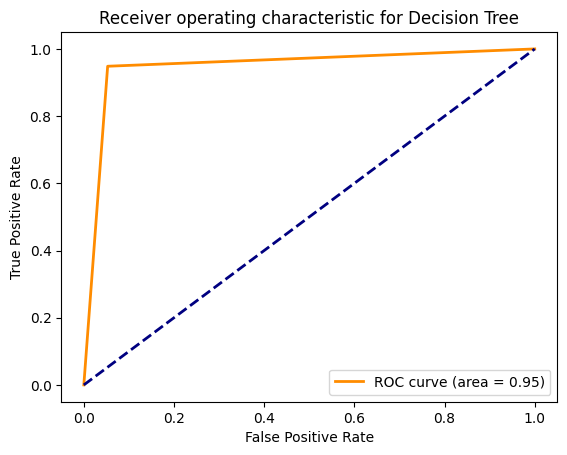

In [30]:
from sklearn.metrics import roc_curve, auc
k = 5
kf = KFold(n_splits=k, random_state=None)
modelDT = DecisionTreeClassifier(max_depth=35, min_samples_split=3)

acc_score = []
y_true = []
y_pred = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelDT.fit(X_train, y_train)

    pred_values = modelDT.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)
#

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

### XG BOOST

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb

k =5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_xgb = xgb.XGBClassifier()

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

# Get confusion matrix
cm = confusion_matrix(y_test_list, y_pred_list)
print('Confusion Matrix:\n', cm)

# Get classification report
cr = classification_report(y_test_list, y_pred_list)
print('Classification Report:\n', cr)

# Get ROC AUC score
roc_auc = roc_auc_score(y_test_list, y_pred_list)
print('ROC AUC Score:', roc_auc)

# Save the trained model
model_xgb.save_model("xgb_model.bin")


Accuracy of each fold - [0.95554554, 0.9599615465454, 0.943126514986419, 0.9524103831891224, 0.9598269468479604]
Average accuracy: 0.9541741863137805
Confusion Matrix:
 [[1568   78]
 [  64 1526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1646
           1       0.95      0.96      0.96      1590

    accuracy                           0.96      3236
   macro avg       0.96      0.96      0.96      3236
weighted avg       0.96      0.96      0.96      3236

ROC AUC Score: 0.9561804106773042


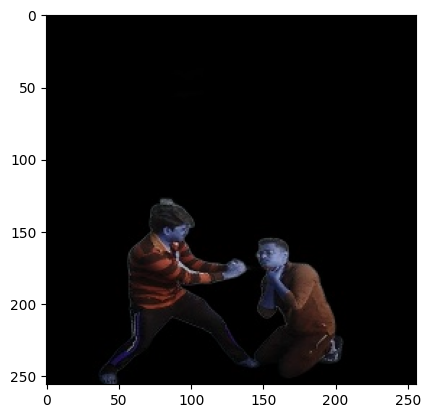

descriptor shape  1  :  (24576,)


In [33]:

imgpath = r'D:\module 6\CV\CP\New\ONImages\samples\CV_CP_HOG\Test_HOG\image287.jpg'

i =1

img = cv2.imread(imgpath)
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fd, hog_image = hog(gray, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
# Convert the descriptor array into a DataFrame format

# print(df)
print("descriptor shape ", i, " : ", fd.shape)


df = pd.DataFrame(fd)

df_transposed = df.transpose()
df_transposed



pca = joblib.load('PCA_Model.sav')

fd_pca = pca.transform(df_transposed)



In [34]:
# Load the model

loaded_model = joblib.load("svm_Kfold_HOG.sav")

# Use the loaded model for prediction
y_pred = loaded_model.predict(fd_pca)
print(y_pred)


if y_pred == 0:
    print("Abnormal")
else:
    print("Normal")

[0]
Abnormal


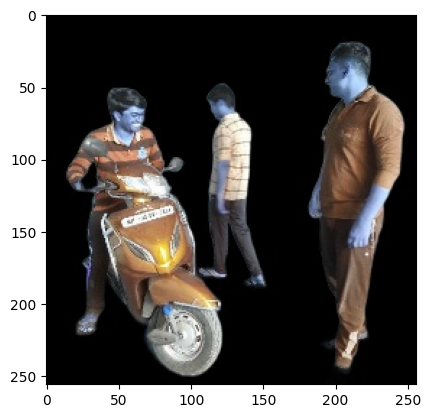

descriptor shape  0  :  (24576,)


In [126]:

imgpath = r'D:\module 6\CV\CP\New\ONImages\samples\CV_CP_HOG\Test_HOG\image541.jpg'



img = cv2.imread(imgpath)
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fd, hog_image = hog(gray, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
# Convert the descriptor array into a DataFrame format

# print(df)
print("descriptor shape ", i, " : ", fd.shape)


df = pd.DataFrame(fd)

df_transposed = df.transpose()
df_transposed



pca = joblib.load('PCA_Model.sav')

fd_pca = pca.transform(df_transposed)



In [127]:
loaded_model = joblib.load("svm_Kfold_HOG.sav")

# Use the loaded model for prediction
y_pred = loaded_model.predict(fd_pca)
print(y_pred)


if y_pred == 0:
    print("Abnormal")
else:
    print("Normal")

[1]
Normal
